## Ejercicios

In [33]:
import pandas as pd
import numpy as np

import warnings

from pathlib import Path

import matplotlib.pyplot as plt

data_path = Path('../estructura_datos/data')
warnings.filterwarnings('ignore')

In [34]:
data = pd.read_csv(data_path / 'house.csv')
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


### Ejercicio 1

In [35]:
price_grp = pd.qcut(data['price'], q = 5, labels = np.arange(5))
price_grp

0       1
1       4
2       1
3       2
4       3
       ..
4595    1
4596    3
4597    2
4598    0
4599    0
Name: price, Length: 4600, dtype: category
Categories (5, int32): [0 < 1 < 2 < 3 < 4]

In [36]:
data = data.assign(price_grp = price_grp)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_grp
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,4
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,3


In [37]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
price_grp        0
dtype: int64

In [38]:
data['price'].mean()

551962.9884732141

In [39]:
data.bedrooms.unique()

array([3., 5., 4., 2., 6., 7., 9., 1., 8., 0.])

## Ejercicio 3

In [43]:
pv = pd.pivot_table(data = data, index = 'condition', columns = 'floors', values = 'price', aggfunc='mean')
pv

floors,1.0,1.5,2.0,2.5,3.0,3.5
condition,,,,,,
1,282560.000000,427000.000000,NaN,NaN,NaN,NaN
2,244226.000000,304077.500000,1.019333e+06,NaN,NaN,NaN
3,446558.941667,526978.427508,6.229194e+05,8.089961e+05,5.258662e+05,829250.0
4,466853.537639,577914.810000,6.882935e+05,1.099125e+06,1.693125e+06,NaN
5,493234.266874,698686.446964,9.978914e+05,2.038333e+06,7.700000e+05,NaN


In [41]:
pv.fillna(0, inplace = True)
pv

floors,1.0,1.5,2.0,2.5,3.0,3.5
condition,,,,,,
1,282560.000000,427000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0
2,244226.000000,304077.500000,1.019333e+06,0.000000e+00,0.000000e+00,0.0
3,446558.941667,526978.427508,6.229194e+05,8.089961e+05,5.258662e+05,829250.0
4,466853.537639,577914.810000,6.882935e+05,1.099125e+06,1.693125e+06,0.0
5,493234.266874,698686.446964,9.978914e+05,2.038333e+06,7.700000e+05,0.0


<Axes: xlabel='condition'>

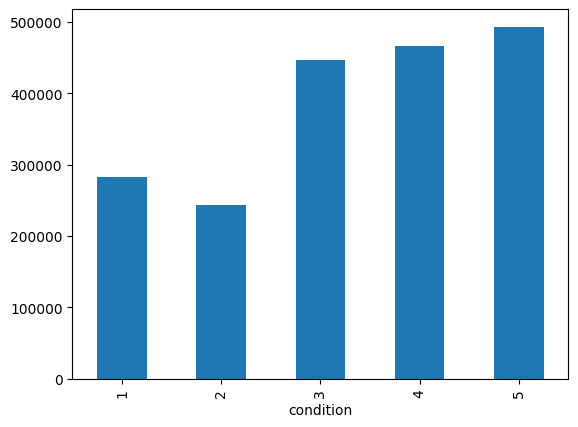

In [42]:
pv[1.0].plot(kind = 'bar')